In [35]:
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img
from keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

In [29]:
labels = {0: 'African_Elephant',
 1: 'Amur_Leopard',
 2: 'Arctic_Fox',
 3: 'Chimpanzee',
 4: 'Jaguars',
 5: 'Lion',
 6: 'Orangutan',
 7: 'Panda',
 8: 'Panthers',
 9: 'Rhino',
 10: 'cheetahs'}

labels

{0: 'African_Elephant',
 1: 'Amur_Leopard',
 2: 'Arctic_Fox',
 3: 'Chimpanzee',
 4: 'Jaguars',
 5: 'Lion',
 6: 'Orangutan',
 7: 'Panda',
 8: 'Panthers',
 9: 'Rhino',
 10: 'cheetahs'}

In [30]:
from tensorflow.keras.applications import InceptionResNetV2

inceptionresnet = InceptionResNetV2(include_top=False,
    weights=None,
    input_shape=(299,299,3) 
)
for layer in inceptionresnet.layers:
    layer.trainable = False
base_output = GlobalAveragePooling2D()(inceptionresnet.output)
predictions = Dense(11, activation = "softmax", name = "predictions")(base_output)
my_inceptionresnet_model = Model(inputs = inceptionresnet.input, outputs = predictions)

In [31]:
my_inceptionresnet_model.load_weights("inceptionresnet_model.h5")

In [32]:
image_path = "/Users/fouad/Desktop/HU-Workshop/Notebooks/danger-of-extinction-animals/test_images/african_elephant_1.jpeg"
img_inceptionresnet = (img_to_array(load_img(image_path, target_size = (299,299)))/255.).reshape(1,299,299,3)

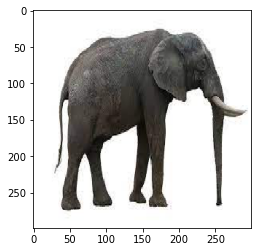

The predicted result is: African_Elephant


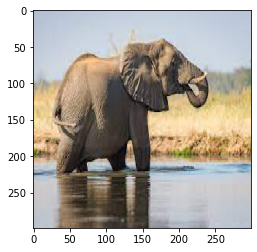

The predicted result is: African_Elephant


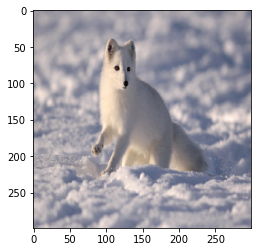

The predicted result is: Arctic_Fox


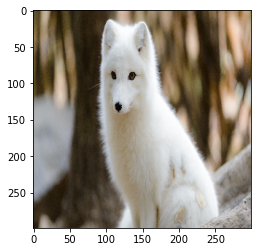

The predicted result is: Arctic_Fox


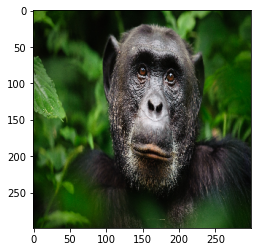

The predicted result is: Chimpanzee


In [45]:
test_path = "/Users/fouad/Desktop/HU-Workshop/Notebooks/danger-of-extinction-animals/test_images/"
for images in sorted(os.listdir(test_path)):
    image_display = load_img(test_path+"/"+images, target_size = (299,299))
    plt.imshow(image_display)
    plt.show()
    img_inceptionresnet = (img_to_array(load_img(test_path+"/"+images, target_size = (299,299)))/255.).reshape(1,299,299,3)
    results = np.argmax((my_inceptionresnet_model(img_inceptionresnet)).numpy(), axis = -1)
    print("The predicted result is:",labels[int(results)])